In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sb
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action="ignore")
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/autompg-dataset/auto-mpg.csv


In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 10)
pd.set_option('display.width', 170)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [3]:
df= pd.read_csv("/kaggle/input/autompg-dataset/auto-mpg.csv")
df.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.000,8,307.000,130,3504,12.000,70,1,chevrolet chevelle malibu
1,15.000,8,350.000,165,3693,11.500,70,1,buick skylark 320
2,18.000,8,318.000,150,3436,11.000,70,1,plymouth satellite
3,16.000,8,304.000,150,3433,12.000,70,1,amc rebel sst
4,17.000,8,302.000,140,3449,10.500,70,1,ford torino
5,15.000,8,429.000,198,4341,10.000,70,1,ford galaxie 500
6,14.000,8,454.000,220,4354,9.000,70,1,chevrolet impala
7,14.000,8,440.000,215,4312,8.500,70,1,plymouth fury iii
8,14.000,8,455.000,225,4425,10.000,70,1,pontiac catalina
9,15.000,8,390.000,190,3850,8.500,70,1,amc ambassador dpl


In [4]:
df.columns=df.columns.str.strip().str.replace(' ','_')
df.columns=[col.upper() for col in df.columns]
df.head()

,MPG,CYLINDERS,DISPLACEMENT,HORSEPOWER,WEIGHT,ACCELERATION,MODEL_YEAR,ORIGIN,CAR_NAME
0,18.000,8,307.000,130,3504,12.000,70,1,chevrolet chevelle malibu
1,15.000,8,350.000,165,3693,11.500,70,1,buick skylark 320
2,18.000,8,318.000,150,3436,11.000,70,1,plymouth satellite
3,16.000,8,304.000,150,3433,12.000,70,1,amc rebel sst
4,17.000,8,302.000,140,3449,10.500,70,1,ford torino


In [5]:
 def check_dataset(data):
    print("-------------------------------------------------- SHAPE --------------------------------------------------")
    print(data.shape)
    print("-------------------------------------------------- INFO --------------------------------------------------")
    print(data.info())
    print("-------------------------------------------------- ISNA --------------------------------------------------")
    print(data.isnull().sum().sort_values(ascending=False))
    print("-------------------------------------------------- NUNIQUE --------------------------------------------------")
    print(data.nunique())
    print("-------------------------------------------------- DESCRIBE --------------------------------------------------")
    print(data.describe().T)
    pass

In [6]:
check_dataset(df)

-------------------------------------------------- SHAPE --------------------------------------------------
(398, 9)
-------------------------------------------------- INFO --------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   CYLINDERS     398 non-null    int64  
 2   DISPLACEMENT  398 non-null    float64
 3   HORSEPOWER    398 non-null    object 
 4   WEIGHT        398 non-null    int64  
 5   ACCELERATION  398 non-null    float64
 6   MODEL_YEAR    398 non-null    int64  
 7   ORIGIN        398 non-null    int64  
 8   CAR_NAME      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB
None
-------------------------------------------------- ISNA --------------------------------------------------
MPG             0
CYLIND

# checking the data for NaN values

In [7]:
non_numeric = ~df['HORSEPOWER'].astype(str).str.isnumeric()
non2 = ~df['MPG'].astype(str).str.isnumeric()
non3 = ~df['CYLINDERS'].astype(str).str.isnumeric()
non4 = ~df['DISPLACEMENT'].astype(str).str.isnumeric()
non5 = ~df['WEIGHT'].astype(str).str.isnumeric()
non6 = ~df['ACCELERATION'].astype(str).str.isnumeric()
non7 = ~df['MODEL_YEAR'].astype(str).str.isnumeric()
non8 = ~df['ORIGIN'].astype(str).str.isnumeric()
# Display rows with non-numeric entries
print(df[non_numeric],"\n","HORSEPOWER")
print("--------------------------------------------------")
print(df['MPG'].dtype)
print(df[non2])
print("--------------------------------------------------")
print(df['CYLINDERS'].dtype)
print(df[non3])
print("--------------------------------------------------")
print(df['DISPLACEMENT'].dtype)
print(df[non4])
print("--------------------------------------------------")
print(df['WEIGHT'].dtype)
print(df[non5])
print("--------------------------------------------------")
print(df['ACCELERATION'].dtype)
print(df[non6])
print("--------------------------------------------------")
print(df['MODEL_YEAR'].dtype)
print(df[non7])
print("--------------------------------------------------")
print(df['ORIGIN'].dtype)
print(df[non8])


       MPG  CYLINDERS  DISPLACEMENT HORSEPOWER  WEIGHT  ACCELERATION  MODEL_YEAR  ORIGIN              CAR_NAME
32  25.000          4        98.000          ?    2046        19.000          71       1            ford pinto
126 21.000          6       200.000          ?    2875        17.000          74       1         ford maverick
330 40.900          4        85.000          ?    1835        17.300          80       2  renault lecar deluxe
336 23.600          4       140.000          ?    2905        14.300          80       1    ford mustang cobra
354 34.500          4       100.000          ?    2320        15.800          81       2           renault 18i
374 23.000          4       151.000          ?    3035        20.500          82       1        amc concord dl 
 HORSEPOWER
--------------------------------------------------
float64
       MPG  CYLINDERS  DISPLACEMENT HORSEPOWER  WEIGHT  ACCELERATION  MODEL_YEAR  ORIGIN                   CAR_NAME
0   18.000          8       307.000

In [8]:
df['HORSEPOWER'] = pd.to_numeric(df['HORSEPOWER'], errors='coerce')
print(df[non_numeric])

       MPG  CYLINDERS  DISPLACEMENT  HORSEPOWER  WEIGHT  ACCELERATION  MODEL_YEAR  ORIGIN              CAR_NAME
32  25.000          4        98.000         NaN    2046        19.000          71       1            ford pinto
126 21.000          6       200.000         NaN    2875        17.000          74       1         ford maverick
330 40.900          4        85.000         NaN    1835        17.300          80       2  renault lecar deluxe
336 23.600          4       140.000         NaN    2905        14.300          80       1    ford mustang cobra
354 34.500          4       100.000         NaN    2320        15.800          81       2           renault 18i
374 23.000          4       151.000         NaN    3035        20.500          82       1        amc concord dl


In [9]:
check_dataset(df)

-------------------------------------------------- SHAPE --------------------------------------------------
(398, 9)
-------------------------------------------------- INFO --------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   CYLINDERS     398 non-null    int64  
 2   DISPLACEMENT  398 non-null    float64
 3   HORSEPOWER    392 non-null    float64
 4   WEIGHT        398 non-null    int64  
 5   ACCELERATION  398 non-null    float64
 6   MODEL_YEAR    398 non-null    int64  
 7   ORIGIN        398 non-null    int64  
 8   CAR_NAME      398 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB
None
-------------------------------------------------- ISNA --------------------------------------------------
HORSEPOWER      6
MPG   

In [10]:
df= df.dropna()
check_dataset(df)

-------------------------------------------------- SHAPE --------------------------------------------------
(392, 9)
-------------------------------------------------- INFO --------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           392 non-null    float64
 1   CYLINDERS     392 non-null    int64  
 2   DISPLACEMENT  392 non-null    float64
 3   HORSEPOWER    392 non-null    float64
 4   WEIGHT        392 non-null    int64  
 5   ACCELERATION  392 non-null    float64
 6   MODEL_YEAR    392 non-null    int64  
 7   ORIGIN        392 non-null    int64  
 8   CAR_NAME      392 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 30.6+ KB
None
-------------------------------------------------- ISNA --------------------------------------------------
MPG             0
CYLINDERS  

In [11]:
def col_types(data,cat_th=25,num_th=10):
    cat_cols =[col for col in data.columns if data[col].dtypes=="o"]
    num_cols = [col for col in data.columns if data[col].dtypes!="o"]
    cat_but_num = [col for col in data.columns if data[col].dtypes=="o"
                  and data[col].nunique()>cat_th]
    num_but_cat = [col for col in data.columns if data[col].dtypes!="o"
                  and data[col].nunique()<num_th]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_num]
    num_cols = [col for col in num_cols if col not in num_but_cat]
    
    print(f"Categorical Cols : {len(cat_cols)}")
    print(f"Numerical Cols : {len(num_cols)}")
    print(f"CategoricL but Numerical Cols : {len(cat_but_num)}")
    print(f"Numerical but Categorical Cols : {len(num_but_cat)}")
    
    return cat_cols , num_cols , cat_but_num

In [12]:
cat_cols , num_cols , cat_but_num = col_types(df)

Categorical Cols : 2
Numerical Cols : 7
CategoricL but Numerical Cols : 0
Numerical but Categorical Cols : 2


In [13]:
print(cat_cols)
print(num_cols)

['CYLINDERS', 'ORIGIN']
['MPG', 'DISPLACEMENT', 'HORSEPOWER', 'WEIGHT', 'ACCELERATION', 'MODEL_YEAR', 'CAR_NAME']


In [14]:
num_cols.remove("CAR_NAME")
num_cols

['MPG', 'DISPLACEMENT', 'HORSEPOWER', 'WEIGHT', 'ACCELERATION', 'MODEL_YEAR']

In [15]:
def cat_plot(data,col_name):       
    sb.countplot(x=data[col_name],data=data)
    plt.title(col_name)
    plt.show()
    print(pd.DataFrame({col_name: data[col_name].value_counts(),
                        "Ratio": 100 * data[col_name].value_counts() / len(data)}))
    print("-----------------------------------------------------------------------------",end="\n\n\n")

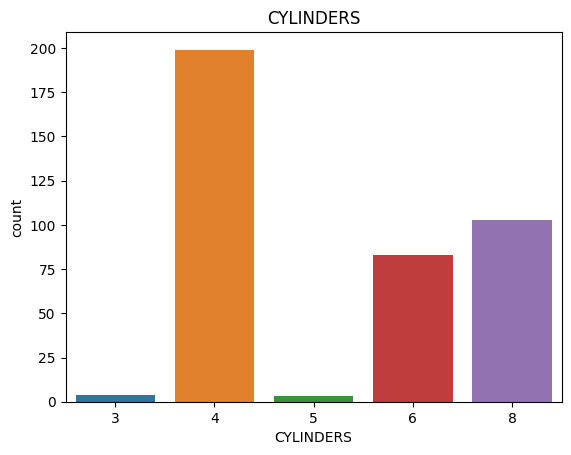

           CYLINDERS  Ratio
CYLINDERS                  
4                199 50.765
8                103 26.276
6                 83 21.173
3                  4  1.020
5                  3  0.765
-----------------------------------------------------------------------------




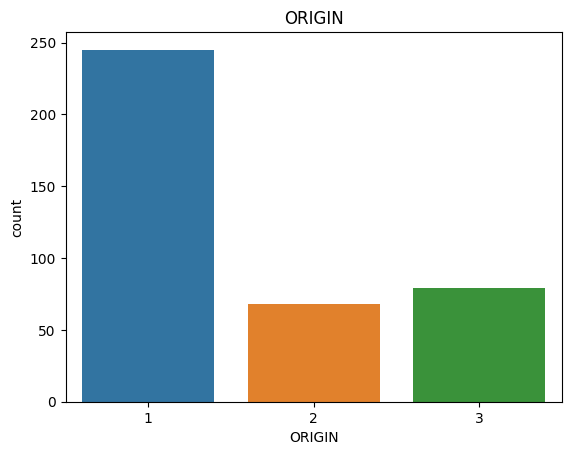

        ORIGIN  Ratio
ORIGIN               
1          245 62.500
3           79 20.153
2           68 17.347
-----------------------------------------------------------------------------




In [16]:
for col in cat_cols:
    cat_plot(df, col)

In [17]:
# Replace inf and -inf values with NaN in the DataFrame
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna()

,MPG,CYLINDERS,DISPLACEMENT,HORSEPOWER,WEIGHT,ACCELERATION,MODEL_YEAR,ORIGIN,CAR_NAME
0,18.000,8,307.000,130.000,3504,12.000,70,1,chevrolet chevelle malibu
1,15.000,8,350.000,165.000,3693,11.500,70,1,buick skylark 320
2,18.000,8,318.000,150.000,3436,11.000,70,1,plymouth satellite
3,16.000,8,304.000,150.000,3433,12.000,70,1,amc rebel sst
4,17.000,8,302.000,140.000,3449,10.500,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.000,4,140.000,86.000,2790,15.600,82,1,ford mustang gl
394,44.000,4,97.000,52.000,2130,24.600,82,2,vw pickup
395,32.000,4,135.000,84.000,2295,11.600,82,1,dodge rampage
396,28.000,4,120.000,79.000,2625,18.600,82,1,ford ranger


In [18]:
def num_plot(data, col_name):    
    # Set color for histogram
    color = plt.cm.viridis(0.5)  # Pick a single color from the Viridis colormap
    
    # Plot histogram with density for easier comparison with KDE
    plt.hist(data[col_name], bins=50, color=color, edgecolor='black', density=True, alpha=0.6, label="Histogram")
    
    # Overlay KDE plot
    sb.kdeplot(data[col_name], color='yellow', linewidth=2, label="KDE")
    
    # Add labels and title
    plt.xlabel(col_name)
    plt.title(f"Distribution of {col_name}")
    plt.legend()  # Add legend to distinguish between histogram and KDE
    plt.show()
    
    # Display summary statistics
    print(data[col_name].describe().T)  
    print("----------------------------------------------------------------------------\n\n")

In [19]:
num_cols

['MPG', 'DISPLACEMENT', 'HORSEPOWER', 'WEIGHT', 'ACCELERATION', 'MODEL_YEAR']

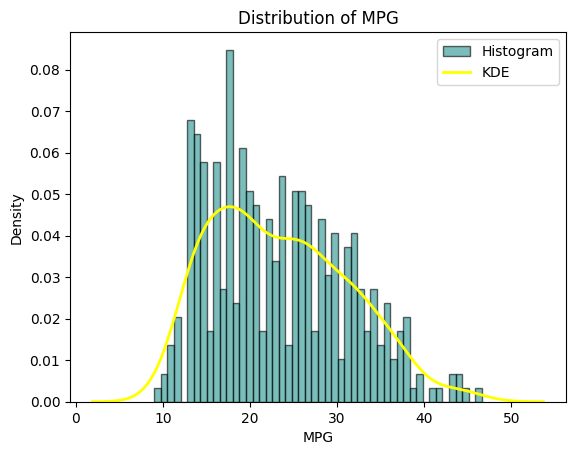

count   392.000
mean     23.446
std       7.805
min       9.000
25%      17.000
50%      22.750
75%      29.000
max      46.600
Name: MPG, dtype: float64
----------------------------------------------------------------------------




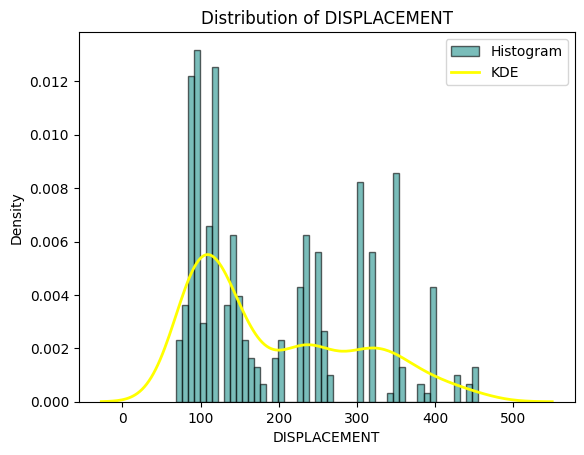

count   392.000
mean    194.412
std     104.644
min      68.000
25%     105.000
50%     151.000
75%     275.750
max     455.000
Name: DISPLACEMENT, dtype: float64
----------------------------------------------------------------------------




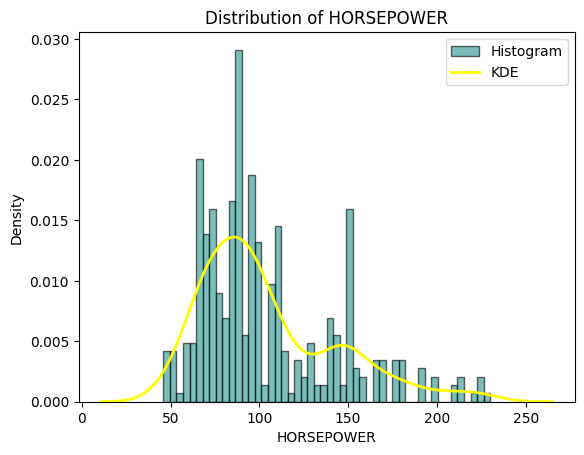

count   392.000
mean    104.469
std      38.491
min      46.000
25%      75.000
50%      93.500
75%     126.000
max     230.000
Name: HORSEPOWER, dtype: float64
----------------------------------------------------------------------------




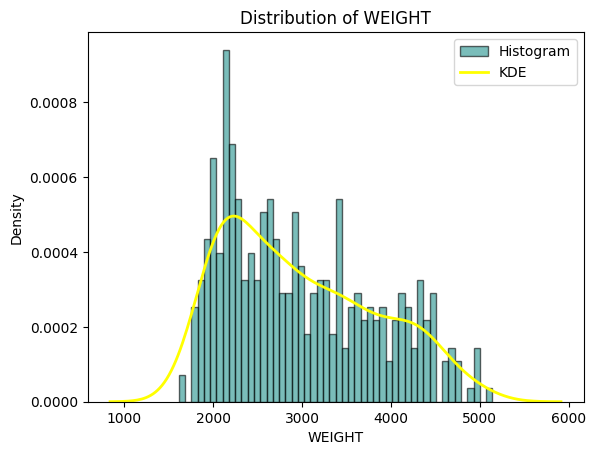

count    392.000
mean    2977.584
std      849.403
min     1613.000
25%     2225.250
50%     2803.500
75%     3614.750
max     5140.000
Name: WEIGHT, dtype: float64
----------------------------------------------------------------------------




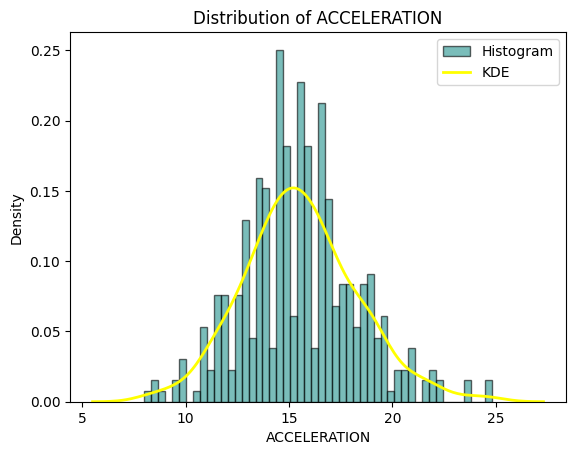

count   392.000
mean     15.541
std       2.759
min       8.000
25%      13.775
50%      15.500
75%      17.025
max      24.800
Name: ACCELERATION, dtype: float64
----------------------------------------------------------------------------




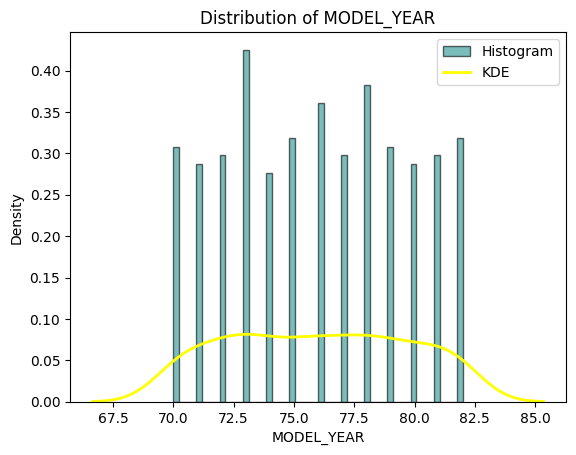

count   392.000
mean     75.980
std       3.684
min      70.000
25%      73.000
50%      76.000
75%      79.000
max      82.000
Name: MODEL_YEAR, dtype: float64
----------------------------------------------------------------------------




In [20]:
for col in num_cols:
    num_plot(df,col)

# **PEARSON'S CORRELATION MATRIX**

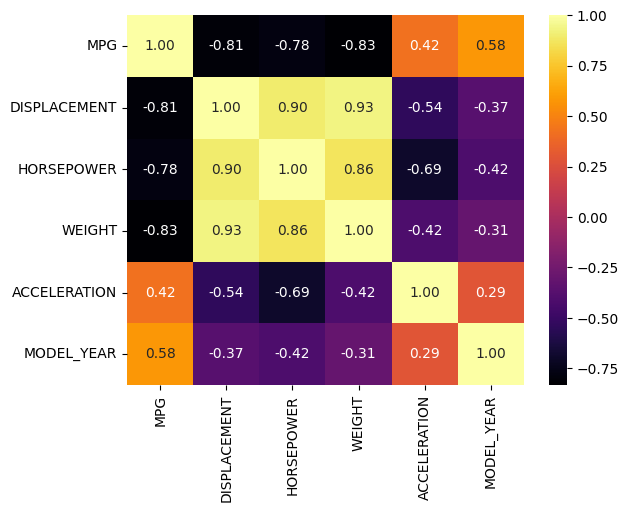

In [21]:
df_num=df[num_cols]
matrix1=df_num.corr(method='pearson')
sb.heatmap(matrix1, cmap="inferno",fmt=".2f", annot=True)
plt.show()

In [22]:
def correlation_monotonic(df_n, type):
  mat=df_n.corr(method=type)
  sb.heatmap(mat, cmap="inferno",fmt=".2f", annot=True)
  plt.show()  

# **SPEARMAN'S CORRELATION MATRIX**

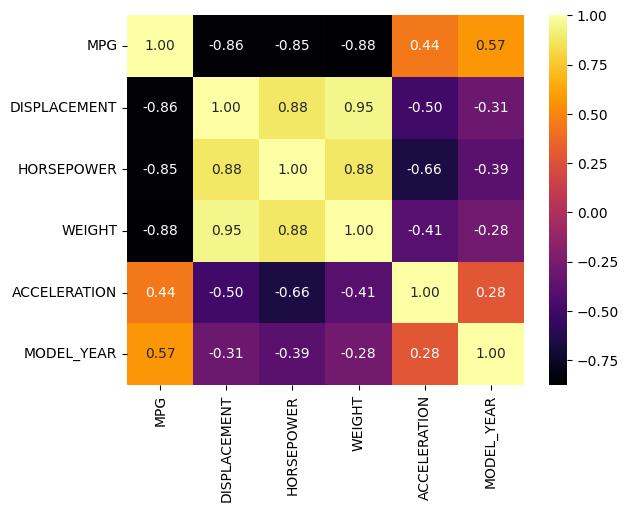

In [23]:
correlation_monotonic(df_num,'spearman')

# **MUTUAL INFORMATION CORRELATION MATRIX**

In [24]:
from sklearn.feature_selection import mutual_info_regression
array= np.zeros((6,6))
for i, col in enumerate(num_cols):
    mi_scores = mutual_info_regression(df[num_cols], df[col])
    for j in range(0,6):
        
       array[j,i] = mi_scores[j]
print(array)
        

[[3.87331178 0.77747371 0.74169559 0.79498761 0.19611179 0.3289326 ]
 [0.79319359 3.81724719 1.38422617 1.14891533 0.32383366 0.20081525]
 [0.72919127 1.37193973 3.7862405  0.82942356 0.40713264 0.28264412]
 [0.7870834  1.13882961 0.83784893 4.66803479 0.2554784  0.1693638 ]
 [0.19644895 0.30868245 0.41822301 0.2634511  3.79419069 0.14450766]
 [0.35013819 0.19338026 0.27219816 0.17812852 0.15989246 2.55774282]]


In [25]:
array.shape

(6, 6)

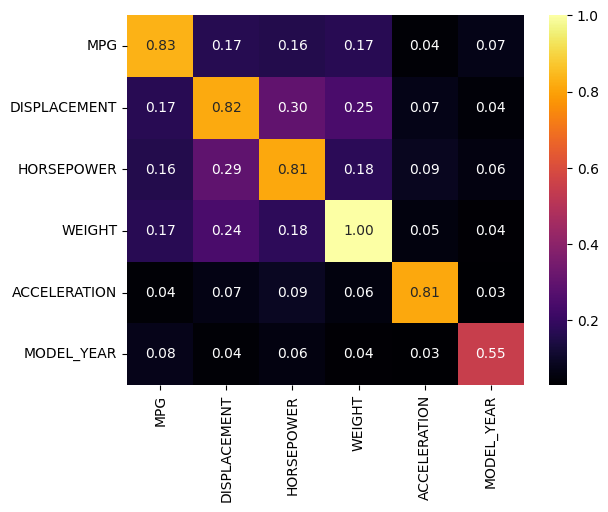

In [26]:
mutual_info_corr = pd.DataFrame(
    array,
    index=num_cols,
    columns=num_cols
)
#Normalization
Max=0
for i, col in enumerate(num_cols):
    if (mutual_info_corr[col].max()> Max):
        Max=mutual_info_corr[col].max()

mutual_info_corr=mutual_info_corr/Max
sb.heatmap(mutual_info_corr, cmap="inferno",fmt=".2f", annot=True)
plt.show()  

In [28]:
df.head()

,MPG,CYLINDERS,DISPLACEMENT,HORSEPOWER,WEIGHT,ACCELERATION,MODEL_YEAR,ORIGIN,CAR_NAME
0,18.000,8,307.000,130.000,3504,12.000,70,1,chevrolet chevelle malibu
1,15.000,8,350.000,165.000,3693,11.500,70,1,buick skylark 320
2,18.000,8,318.000,150.000,3436,11.000,70,1,plymouth satellite
3,16.000,8,304.000,150.000,3433,12.000,70,1,amc rebel sst
4,17.000,8,302.000,140.000,3449,10.500,70,1,ford torino


In [29]:
y=df[['MPG']]
x=df.drop(['MPG','CAR_NAME'], axis=1)
x.head()

,CYLINDERS,DISPLACEMENT,HORSEPOWER,WEIGHT,ACCELERATION,MODEL_YEAR,ORIGIN
0,8,307.000,130.000,3504,12.000,70,1
1,8,350.000,165.000,3693,11.500,70,1
2,8,318.000,150.000,3436,11.000,70,1
3,8,304.000,150.000,3433,12.000,70,1
4,8,302.000,140.000,3449,10.500,70,1


# **CORRELATION OF CATEGORICAL DATA(ASSUMPTOUS)**

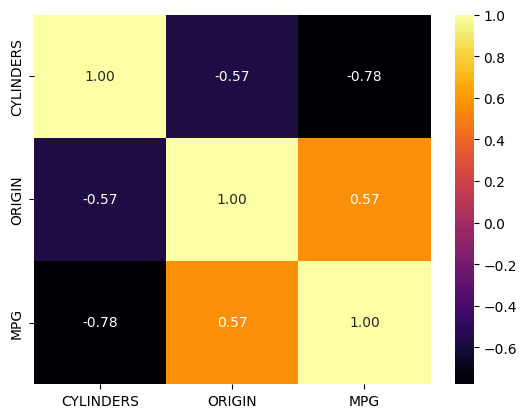

In [34]:
df_encoded = pd.get_dummies(df[cat_cols], drop_first=True)

# Concatenate the encoded DataFrame with the target variable
df_encoded['MPG'] = y

# Calculate the correlation matrix
corr_mat1 = df_encoded.corr()
sb.heatmap(corr_mat1, cmap="inferno",fmt=".2f", annot=True)
plt.show() 

In [30]:
y.head()

,MPG
0,18.000
1,15.000
2,18.000
3,16.000
4,17.000


In [32]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# **MODEL IMPORTING**

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [40]:
from sklearn.svm import SVR

# **Data Splitting**

In [35]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.10,random_state=42)

In [36]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(352, 7)
(40, 7)
(352, 1)
(40, 1)


In [37]:
X_train= MinMaxScaler().fit_transform(X_train)
X_test= MinMaxScaler().fit_transform(X_test)

In [43]:
y_train=MinMaxScaler().fit_transform(y_train)
y_test=MinMaxScaler().fit_transform(y_test)

In [44]:
def base_models(x,y, scoring="r2"):
    Regressions=[
        ("linear", LinearRegression()),
        ("XGB-Regression", XGBRegressor(objective='reg:squarederror')),
        ("SVR-linear",SVR(kernel='linear')),
        ("SVR-RBF", SVR(kernel='rbf'))
    ]
    for name, regression in Regressions:
         cv_results = cross_validate(regression,x,y,cv=5,scoring=scoring)
         print(f"{scoring}: {round(cv_results['test_score'].mean(),4)} {name}")

In [45]:
base_models(X_train,y_train)

r2: 0.8016 linear
r2: 0.8504 XGB-Regression
r2: 0.8006 SVR-linear
r2: 0.8582 SVR-RBF


In [46]:
scoring_metrics=[
    "neg_mean_squared_error", 
    "neg_mean_absolute_error",
    "neg_root_mean_squared_error"
]

In [60]:
for score in scoring_metrics:
    print("\n\t",score)
    base_models(X_train,y_train, scoring=score)
   


	 neg_mean_squared_error
neg_mean_squared_error: -0.0085 linear
neg_mean_squared_error: -0.0064 XGB-Regression
neg_mean_squared_error: -0.0085 SVR-linear
neg_mean_squared_error: -0.0061 SVR-RBF

	 neg_mean_absolute_error
neg_mean_absolute_error: -0.0701 linear
neg_mean_absolute_error: -0.0547 XGB-Regression
neg_mean_absolute_error: -0.0701 SVR-linear
neg_mean_absolute_error: -0.0574 SVR-RBF

	 neg_root_mean_squared_error
neg_root_mean_squared_error: -0.0911 linear
neg_root_mean_squared_error: -0.0789 XGB-Regression
neg_root_mean_squared_error: -0.0913 SVR-linear
neg_root_mean_squared_error: -0.0771 SVR-RBF


In [73]:
def base_models_test(x_train,y_train,X_test,y_test, scoring="r2"):
    Regressions=[
        ("linear", LinearRegression()),
        ("XGB-Regression", XGBRegressor(objective='reg:squarederror')),
        ("SVR-linear",SVR(kernel='linear')),
        ("SVR-RBF", SVR(kernel='rbf'))
    ]
    i=0
    for name, regression in Regressions:
        i=i+1
        cv_results = cross_validate(regression, X_train, y_train, cv=5, scoring=scoring)
        mean_train_score = round(cv_results['test_score'].mean(), 4)
        
        
        regression.fit(X_train, y_train)
        y_pred = regression.predict(X_test)
        
         if scoring == "r2":
            test_score = r2_score(y_test, y_pred)
        elif scoring == "neg_mean_squared_error":
            test_score = mean_squared_error(y_test, y_pred)
        
        
        print(f"{scoring} (Train): {mean_train_score} - {name}")
        print(f"{scoring} (Test): {round(test_score, 4)} - {name}")
        if (i)%2==0:
            print("\n")

In [74]:
base_models_test(X_train,y_train, X_test, y_test)

r2 (Train): 0.8016 - linear
r2 (Test): 0.8498 - linear
r2 (Train): 0.8504 - XGB-Regression
r2 (Test): 0.8056 - XGB-Regression


r2 (Train): 0.8006 - SVR-linear
r2 (Test): 0.8416 - SVR-linear
r2 (Train): 0.8582 - SVR-RBF
r2 (Test): 0.8864 - SVR-RBF




In [77]:
base_models_test(X_train,y_train, X_test, y_test, scoring="neg_mean_squared_error")

neg_mean_squared_error (Train): -0.0085 - linear


UnboundLocalError: local variable 'test_score' referenced before assignment